In [37]:
using CairoMakie, LaTeXStrings
using NAJ

In [47]:
function transform(t)
    θ=range(0, 2π, length=200)
    x0 = @. cos(θ) *0.5
    y0 = @. sin(θ) *0.5 + 1.0
    x = ((x0.+y0)./2 .* exp(t)) .+ ((x0 .- y0)./2 .* exp(-t))
    y = ((x0.+y0)./2 .* exp(t)) .- ((x0 .- y0)./2 .* exp(-t))
    return x, y
end



transform (generic function with 1 method)

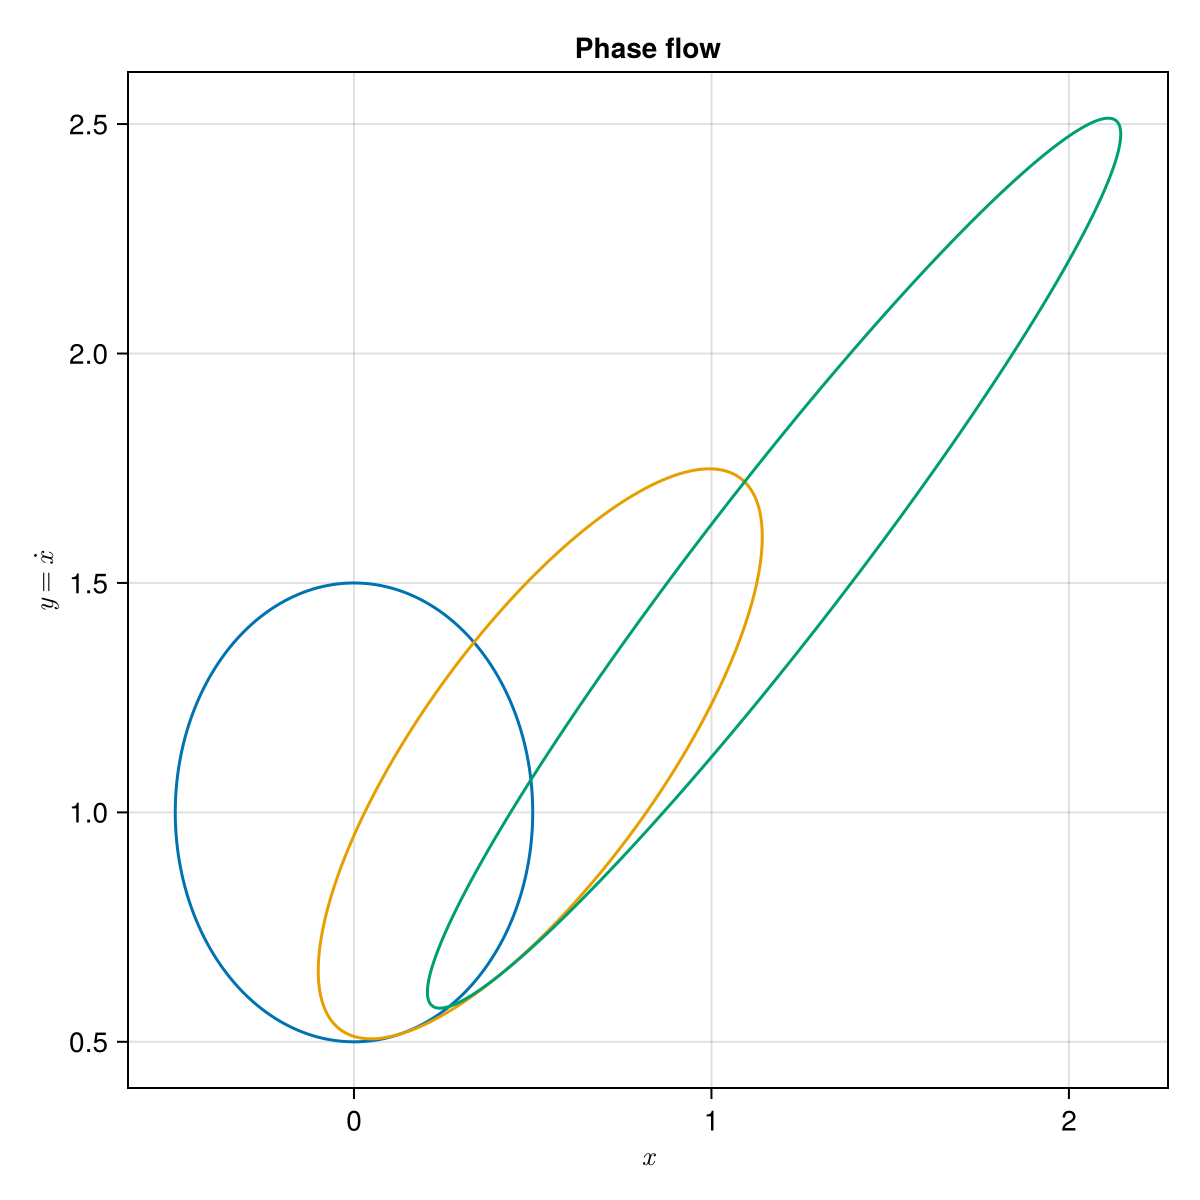

In [49]:

fig = Figure(size = (600, 600))
ax = Axis(fig[1, 1], title = "Phase flow", xlabel = L"x", ylabel = L"y=\dot{x}")
lines!(ax, transform(0.0)...)
lines!(ax, transform(0.5)...)
lines!(ax, transform(1.)...)
fig

In [112]:
θ=range(0, 2π, length=361)
x0 = @. cos(θ) *0.5
y0 = @. sin(θ) *0.5 + 1.0


function rk4(
    fp,
    t1::Real, 
    x1::Vector{<:Real}, 
    Npoints::Integer, 
    h = 1.0e-6) 
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x1), length(tn)))
    xn[:,1] = x1
    for i in 1:(Npoints-1)
        @inbounds k1 = fp(tn[i], xn[:, i])
        @inbounds k2 = fp(tn[i] + h/2, xn[:, i] .+ k1.*(h/2))
        @inbounds k3 = fp(tn[i] + h/2, xn[:, i] .+ k2 .*(h/2))
        @inbounds k4 = fp(tn[i] + h, xn[:, i] .+ k3 .* h)
        @inbounds xn[:, i+1] = xn[:, i] .+ (k1 .+ (2.0 .* k2) .+ (2.0 .* k3) .+ k4).*(h/6)
    end
    return tn, xn
end





rk4 (generic function with 2 methods)

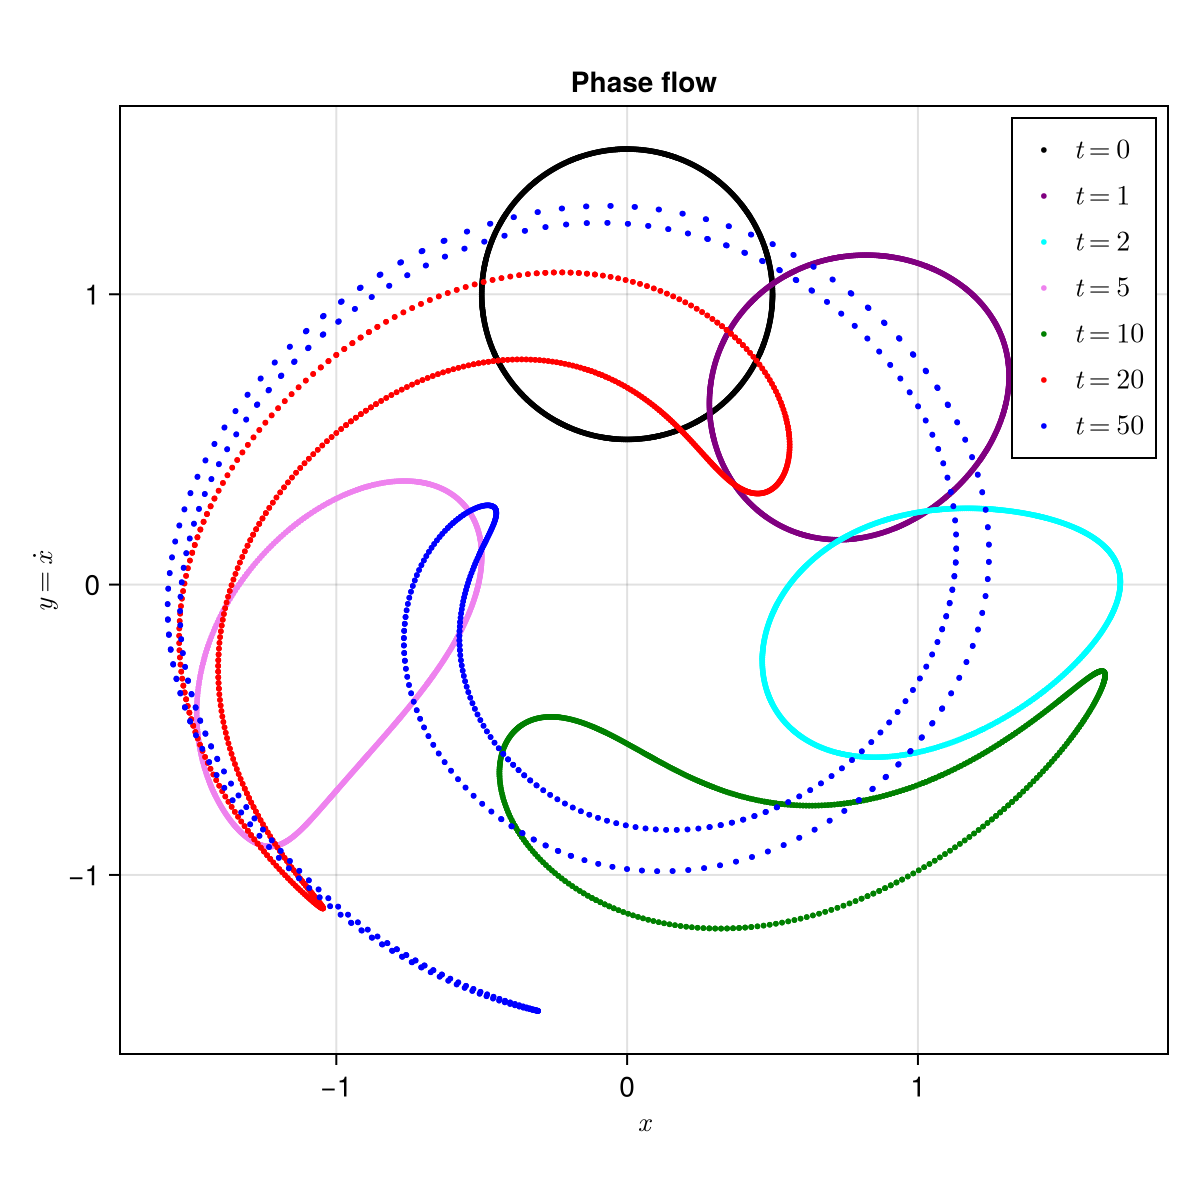

In [150]:
function pf2(dt, Nt)
    X, Y = [], []
    xx = nothing
    for θ ∈ 0:0.33:360
        t, xx = rk4((t, x) -> [x[2], -sin(x[1])], 0.0, [cos(θ)/2, sin(θ)/2+1.0], Nt, dt)
        append!(X, xx[1,end])
        append!(Y, xx[2,end])
    end
    return X, Y
end
fig2 = Figure(size = (600, 600))   
ax1 = Axis(fig2[1, 1], aspect=DataAspect(), title = "Phase flow", xlabel = L"x", ylabel = L"y=\dot{x}")
scatter!(ax1, pf2(0.01, 1)..., color = :black, markersize=4, label = L"t=0")
scatter!(ax1, pf2(0.1, 10)..., color = :purple, markersize=4, label = L"t=1")
scatter!(ax1, pf2(0.1, 20)..., color = :cyan, markersize=4, label = L"t=2")
scatter!(ax1, pf2(0.1, 50)..., color = :violet, markersize=4, label = L"t=5")
scatter!(ax1, pf2(0.1, 100)..., color = :green, markersize=4, label = L"t=10")
scatter!(ax1, pf2(0.1, 200)..., color = :red, markersize=4, label = L"t=20")
scatter!(ax1, pf2(0.1, 500)..., color = :blue, markersize=4, label = L"t=50")
# lines!(ax1, X2[1, :], X2[2, :], color = :red, linewidth = 1.5)
# lines!(ax1, X3[1, :], X3[2, :], color = :green, linewidth = 1.5)
# lines!(ax1, X4[1, :], X4[2, :], color = :teal, linewidth = 1.5)
axislegend(ax1)
fig2

In [110]:
xx

2×200 Matrix{Float64}:
 0.32681  0.462833  0.5944   0.720379  …  -1.46063   -1.50317   -1.53573
 1.37841  1.33995   1.28951  1.22841      -0.475139  -0.375534  -0.275666

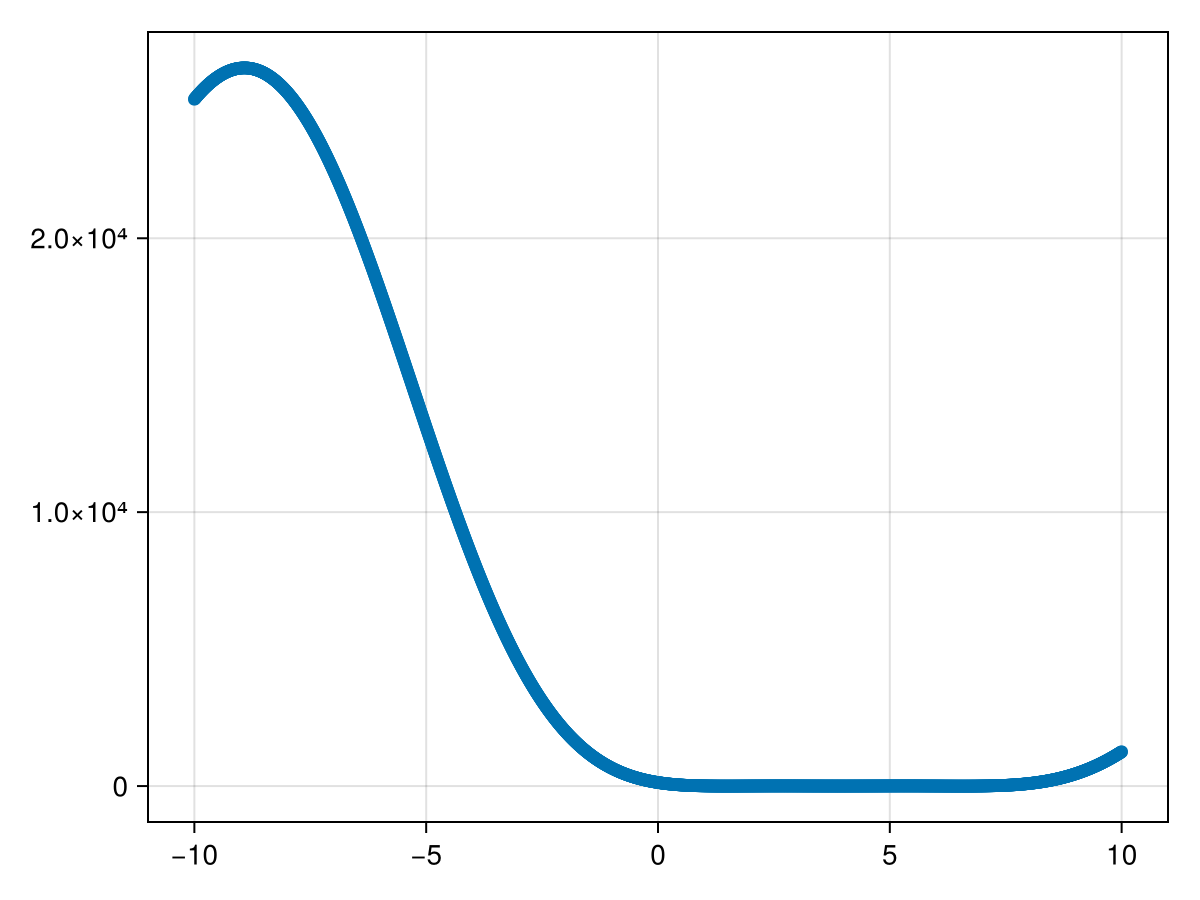

In [323]:
U1= lagrange_polynomial([1.0, 2, 3, 4, 5, 6, 7], [6, 2.0, 3.3, 1.0, 4.0, 2.0, 4.0 ])
U2(x) = U1(x)*(exp(-0.02*(x-3)^2))
x = -10:0.01:10
plot(x, U2.(x))

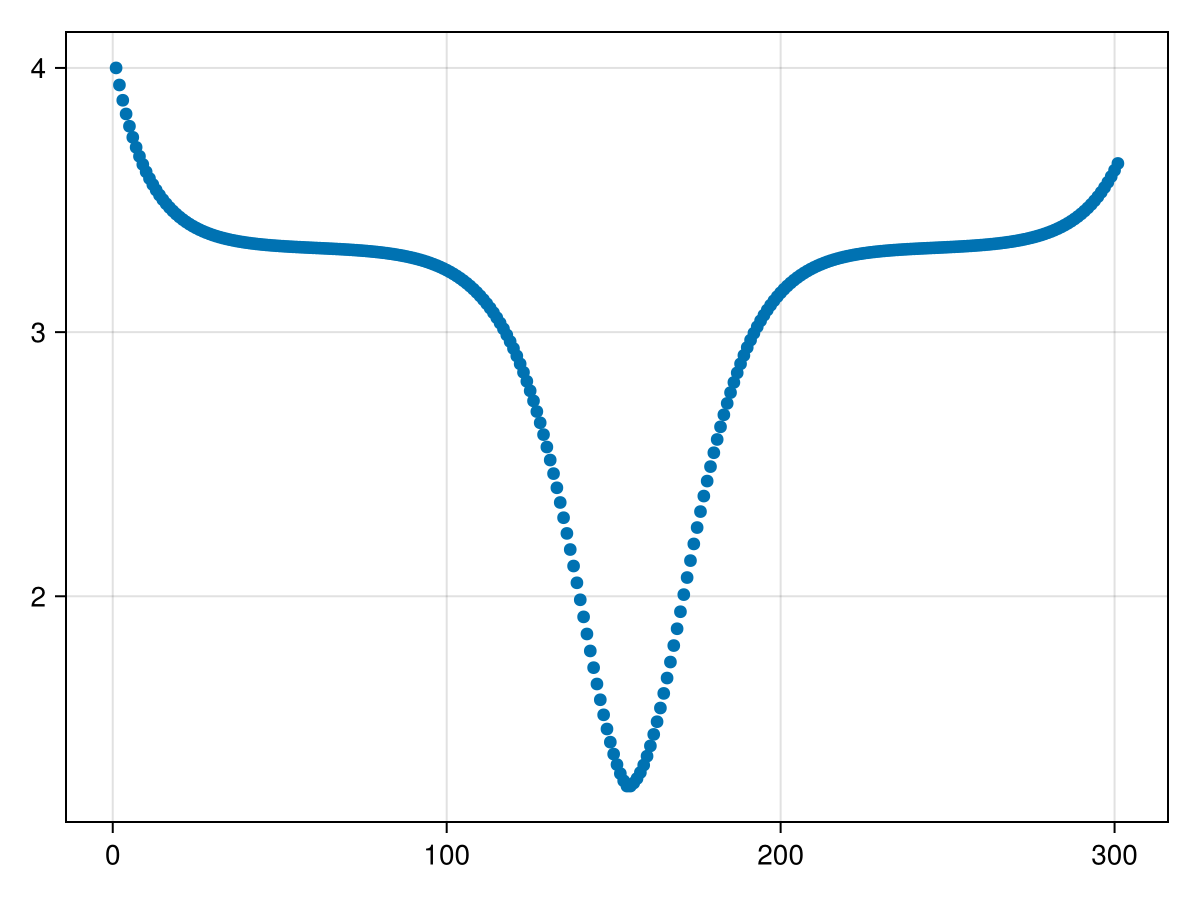

In [286]:
plot(X2)

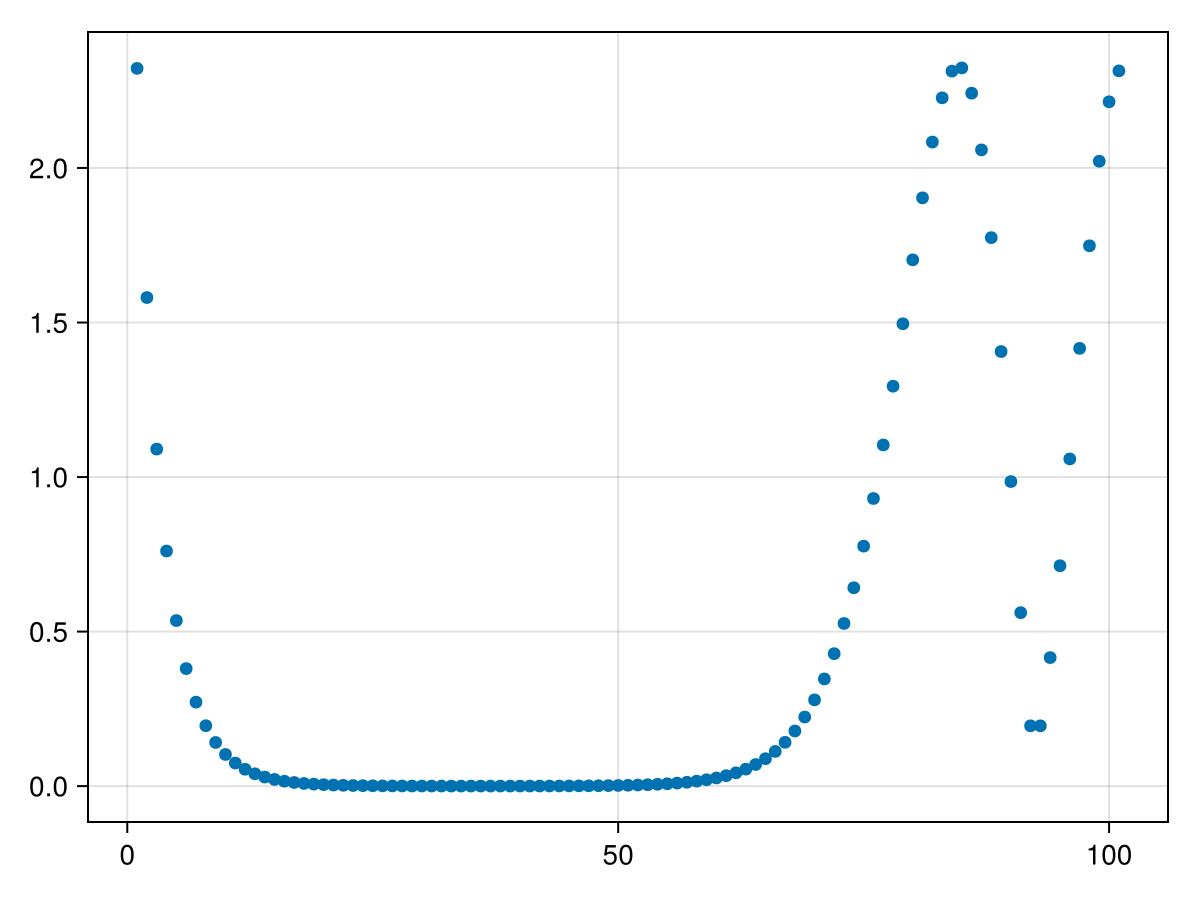

In [193]:
plot(DE)

In [187]:
maximum(U.(x)[100:end])

3.3217920000000163